## Задание 1.4

In [68]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.width = 10000
pd.options.display.max_columns = None

In [87]:
# read dataset from csv file as DataFrame
with open("mobile_phones.csv", "r") as file:
    df = pd.read_csv(file)


print(df.head(5))

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi  price_range
0            842     0          2.2         0   1       0           7    0.6        188        2   2         20       756  2549     9     7         19        0             0     1            1
1           1021     1          0.5         1   0       1          53    0.7        136        3   6        905      1988  2631    17     3          7        1             1     0            2
2            563     1          0.5         1   2       1          41    0.9        145        5   6       1263      1716  2603    11     2          9        1             1     0            2
3            615     1          2.5         0   0       0          10    0.8        131        6   9       1216      1786  2769    16     8         11        1             0     0            2
4           1821     1          1.2

Найдем количество телефонов, имеющих два слота под сим-карту, поддерживающих 3G и максимальное количество ядер процессора 

In [4]:
# counts  
print("Number of phones thats have dual-sim:", df["dual_sim"].value_counts()[1])
print("Number of phones thats supports 3G:", df["three_g"].value_counts()[1])
print("Maximum amount of CPU cores:", df["n_cores"].max())

Number of phones thats have dual-sim: 1019
Number of phones thats supports 3G: 1523
Maximum amount of CPU cores: 8


Рассчитаем выборочное среднее, выборочную дисперсию, выборочную медиану и выборочный квантиль уровня 0.4 для емкости аккумулятора с помощью библиотеки pandas

In [25]:
# batteries 
print("Average battery capacity:", round(df["battery_power"].mean(), 2))
print("Variance of battery capacity:", round(df["battery_power"].var(), 2))
print("Median of battery capacity:", df["battery_power"].median())
print("Quantile 2/5 of battery capacity:", df["battery_power"].quantile(0.4))

print()

# with wifi 
print("Average battery capacity with wifi:", round(df[df["wifi"] == 1]["battery_power"].mean(), 2))
print("Variance of battery capacity with wifi:", round(df[df["wifi"] == 1]["battery_power"].var(), 2))
print("Median of battery capacity with wifi:", df[df["wifi"] == 1]["battery_power"].median())
print("Quantile 2/5 of battery capacity with wifi:", round(df[df["wifi"] == 1]["battery_power"].quantile(0.4), 2))

print()

# without wifi 
print("Average battery capacity with wifi:", round(df[df["wifi"] == 0]["battery_power"].mean(), 2))
print("Variance of battery capacity with wifi:", round(df[df["wifi"] == 0]["battery_power"].var(), 2))
print("Median of battery capacity with wifi:", df[df["wifi"] == 0]["battery_power"].median())
print("Quantile 2/5 of battery capacity with wifi:", df[df["wifi"] == 0]["battery_power"].quantile(0.4))

Average battery capacity: 1238.52
Variance of battery capacity: 193088.36
Median of battery capacity: 1226.0
Quantile 2/5 of battery capacity: 1076.0

Average battery capacity with wifi: 1234.9
Variance of battery capacity with wifi: 190296.4
Median of battery capacity with wifi: 1233.0
Quantile 2/5 of battery capacity with wifi: 1077.8

Average battery capacity with wifi: 1242.24
Variance of battery capacity with wifi: 196128.44
Median of battery capacity with wifi: 1222.0
Quantile 2/5 of battery capacity with wifi: 1076.0


Text(0, 0.5, 'F(x)')

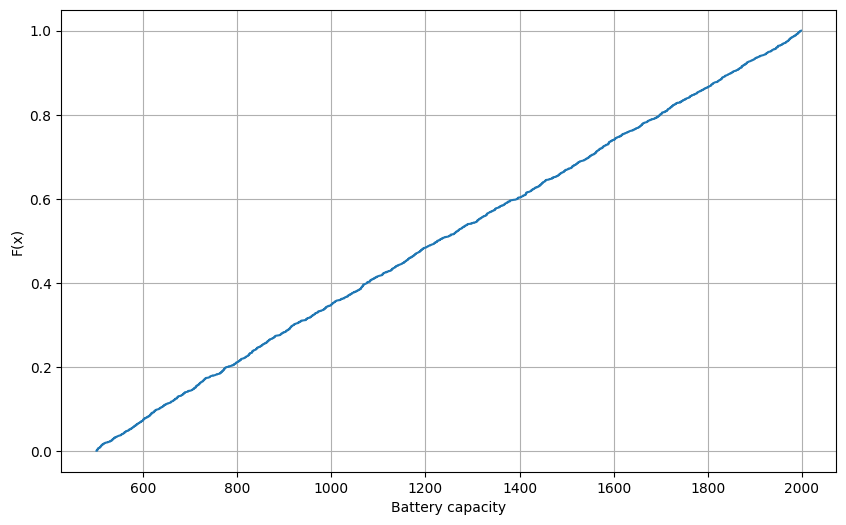

In [26]:
# plot empirical distribution function of battery capacity
sorted_data = df["battery_power"].sort_values()
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.figure(figsize=(10, 6))
plt.plot(sorted_data, y)
plt.grid(which="both")
plt.xlabel("Battery capacity")
plt.ylabel("F(x)")


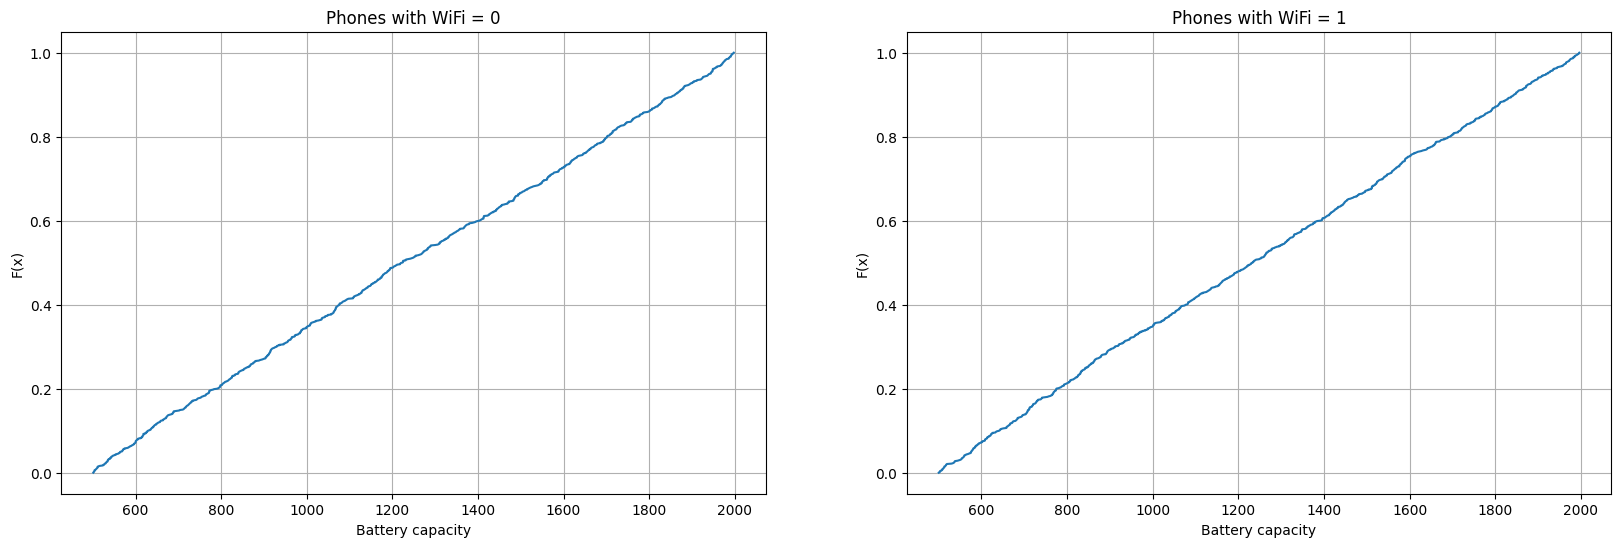

In [27]:
# plot empirical distribution function of battery capacity for phones with and without WiFi
plt.figure(figsize=(20, 6))
for has_wifi in [0, 1]:
    ax = plt.subplot(1, 2, has_wifi + 1)

    sorted_data = df[df["wifi"] == has_wifi]["battery_power"].sort_values()
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    ax.plot(sorted_data, y)
    ax.grid(which="both")
    ax.set_title(f"Phones with WiFi = {has_wifi}")
    ax.set_xlabel("Battery capacity")
    ax.set_ylabel("F(x)")


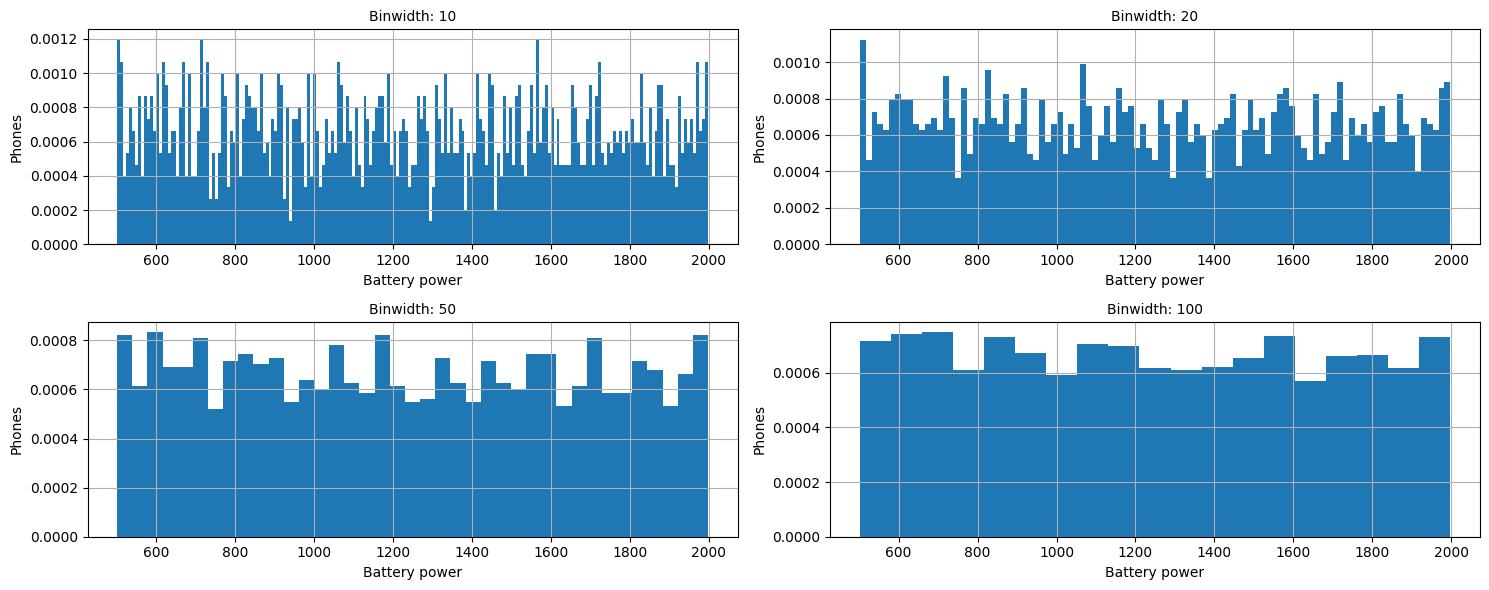

In [64]:
# plot imperial distribution function of battery capacity
plt.figure(figsize=(15, 6))
for i, binwidth in enumerate([10, 20, 50, 100]):

    ax = plt.subplot(2, 2, i + 1)
    ax.hist(df["battery_power"], bins = int(df["battery_power"].max() / binwidth), density = True)
    ax.set_title(f"Binwidth: {binwidth}", size = 10)
    ax.set_xlabel('Battery power')
    ax.set_ylabel('Phones')
    ax.grid()

plt.tight_layout()

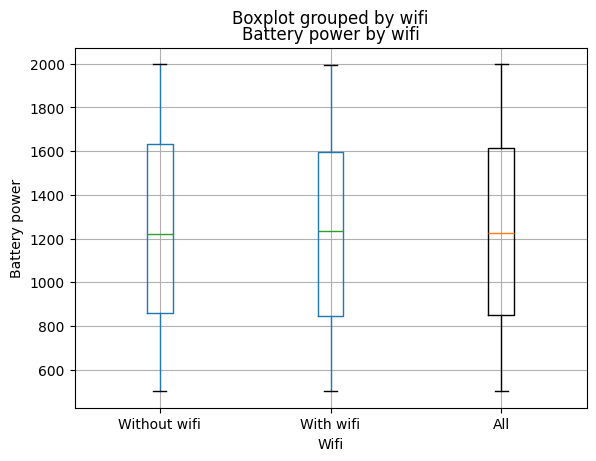

In [59]:
# box-plot
df.boxplot(column='battery_power', by='wifi')
plt.boxplot(df['battery_power'], positions=[3])

plt.title("Battery power by wifi")
plt.ylabel("Battery power")
plt.xlabel("Wifi")
plt.xticks([1, 2, 3], ["Without wifi", "With wifi", "All"])
plt.show()

## Задание 2.2

### Воспользуемся методом моментов для определения параметра $\theta$ распределения Лапласа. 

Имея функцию плотности распределения: 
$$ f_\theta(x) = \frac{1}{2\theta}e^{-\dfrac{|x|}{\theta}} $$
найдем математическое ожидание и дисперсию: 

$$ E[X] = \int_{-\infty}^{+\infty} x f_\theta(x) dx = \int_{-\infty}^{\infty} \frac{x}{2\theta}\exp\left({-\dfrac{|x|}{\theta}}\right) dx = \frac{1}{2\theta} \int_{-\infty}^{\infty} x \exp\left({-\dfrac{|x|}{\theta}}\right) dx  = 0$$

$$ \text{Var}[X] = E[X^2] - E[X]^2 =  \int_{-\infty}^{+\infty} x^2 f_\theta(x) dx - 0 = \frac{1}{2\theta} \int_{-\infty}^{\infty} x^2 \exp\left({-\dfrac{|x|}{\theta}}\right) dx = 2\theta^2$$

### Оценка параметров

Приравниваем теоретические значения математического ожидания и дисперсии к их выборочным аналогам -- выборочному среднему и выборочной дисперсии: 

$$ E[\hat{X}] = 0$$ 
$$ \text{Var}[\hat{X}] = 2\theta^2 \rightarrow \text{Var}[\hat{X}] = 2\hat{\theta}^2$$ 

$$ \hat{\theta} = \sqrt{\frac{\text{Var}[\hat{X}]}{2}}$$

### Проведем эксперимент 

Для этого сгенерируем по $m$ выборок размера $n_i$ из распределения Лапласа с параметром $\theta = 0.5$, найдем в них эмпирические значения выборочного среднего и математического ожидания, по ним найдем оценку параметра $\theta$ и сравним с истинным значением. 

N = 10, wrong estimations = 1808 out of 2000, 90.4% of wrong estimations
N = 100, wrong estimations = 1460 out of 2000, 73.0% of wrong estimations
N = 1000, wrong estimations = 484 out of 2000, 24.2% of wrong estimations
N = 10000, wrong estimations = 2 out of 2000, 0.1% of wrong estimations


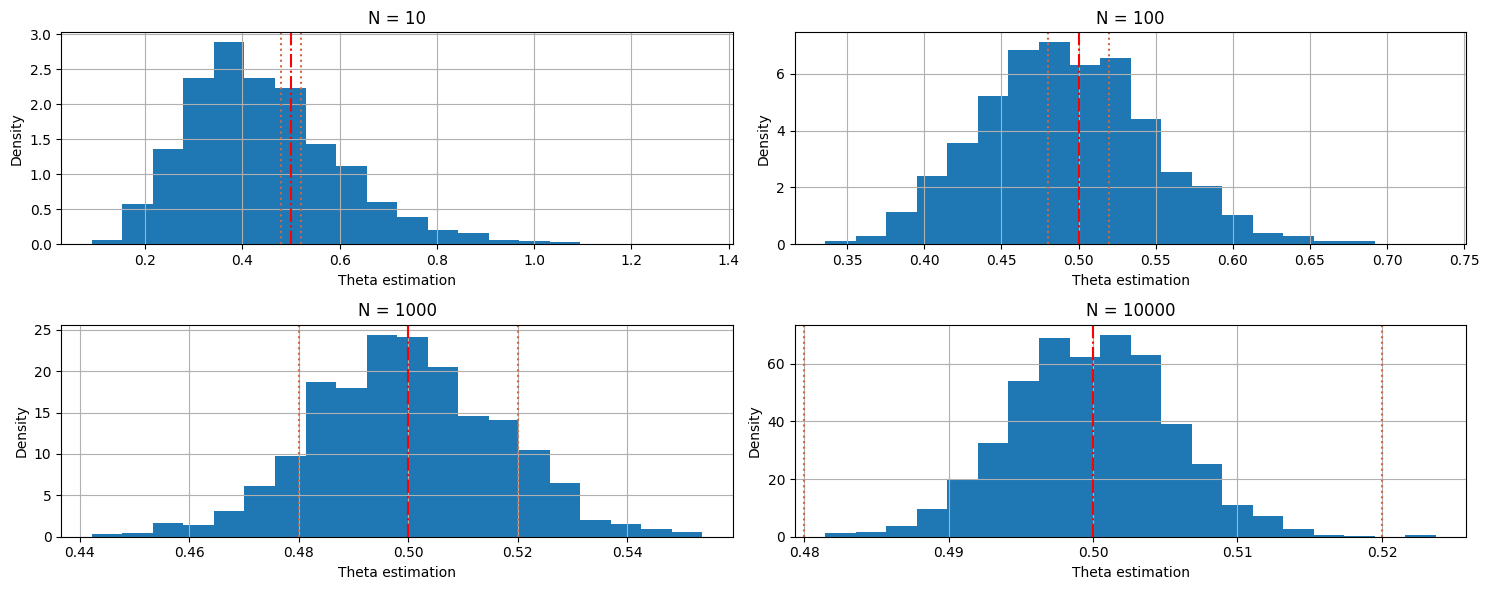

In [112]:
N_sizes = [10, 100, 1000, 10000]
m = 2000
theta_delta = 0.02 # 5%

def laplace_estimation(n):
    return np.random.laplace(0, 0.5, n)

plt.figure(figsize=(15, 6))
for N in N_sizes:
    theta_estimation_arr = []
    for _ in range(m):
        samples = laplace_estimation(N)
        mean = samples.mean()
        variance = samples.var()

        theta_estimation = np.sqrt(variance / 2)
        theta_estimation_arr.append(theta_estimation)

        # print(f"N = {N}, mean = {mean}, variance = {variance}, theta estimation = {theta_estimation}")
    
    wrong_estimations = len([1 for theta in theta_estimation_arr if abs(theta - 0.5) > theta_delta])
    print(f"N = {N}, wrong estimations = {wrong_estimations} out of {m}, {round(wrong_estimations / m * 100, 2)}% of wrong estimations")
    ax = plt.subplot(2, 2, N_sizes.index(N) + 1)
    ax.hist(theta_estimation_arr, bins = 20, density = True)
    ax.axvline(x=0.5, color='r', linestyle='-.')
    ax.axvline(x=0.5 - theta_delta, color='#d06844', linestyle=':')
    ax.axvline(x=0.5 + theta_delta, color='#d06844', linestyle=':')
    ax.set_title(f"N = {N}")
    ax.set_xlabel("Theta estimation")
    ax.set_ylabel("Density")
    ax.grid()

plt.tight_layout()